# Load and plot results from control script runs

In [21]:
from importlib import reload

import matplotlib.pyplot as plt
import pickle
import numpy as np

from adaptive_time import plot_utils
from adaptive_time import utils

from pprint import pprint

plot_utils = reload(plot_utils)
utils = reload(utils)

In [ ]:
utils.set_directory_in_project()

In [23]:
# A run where adaptive does great than collapses.
# res_file_path = "exp_results/old/tradeoff_results_20240227-113757.pkl"

# Longer run with more seeds, changed params.
res_file_path = "exp_results/old/tradeoff_results_20240228-221208.pkl"

with open(res_file_path, "rb") as f:
    loaded = pickle.load(f)
    if "results" in loaded:
        results = loaded["results"]
        print("The config for these results was: ")
        pprint(loaded["config"])
    else:
        results = loaded

The config for these results was: 
{'budget': 10000,
 'budget_type': <BudgetType.UPDATES: 2>,
 'do_weighing': True,
 'epsilon': 0.05,
 'gamma': 0.99999,
 'max_env_steps': None,
 'num_runs': 8,
 'policy_to_evaluate': None,
 'save_limit': None,
 'seed': 13,
 'tau': 0.02,
 'termination_prob': 0.002,
 'weights_to_evaluate': None}


In [3]:
def plot_perf(tuples_of_x_y_labels_kwargs, title, show):

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for x, y, label, kwargs in tuples_of_x_y_labels_kwargs:
        plt.plot(x, y, label=label, **kwargs)

    plt.ylabel('Episode\nReturn', rotation=0, labelpad=40)
    plt.legend()

    if title is not None:
      plt.title(title)

    if show:
      plt.show()
    return ax


## Plots of all Individual Runs

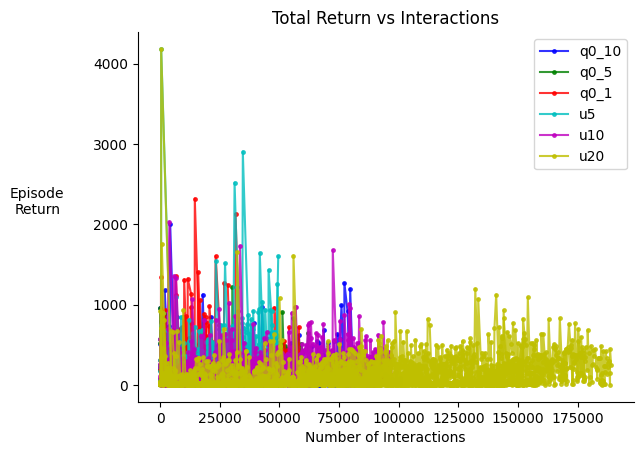

In [4]:


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

tuples_of_x_y_labels_kwargs = []
for i, (name, stats) in enumerate(results.items()):
    for r_idx, run in enumerate(stats):
        tuples_of_x_y_labels_kwargs.append((
            run["total_interactions"],
            run["total_return"],
            name if r_idx==0 else None,
            # {"color": colors[i], "marker": ".", "linestyle": "None", "markersize": 5, "alpha": 0.8}
            {"color": colors[i], "marker": ".", "linestyle": "-", "markersize": 5, "alpha": 0.8}
        ))

ax = plot_perf(tuples_of_x_y_labels_kwargs,
               "Total Return vs Interactions", False)
# ax.set_yscale('log')
ax.set_xlabel('Number of Interactions')
plt.show()



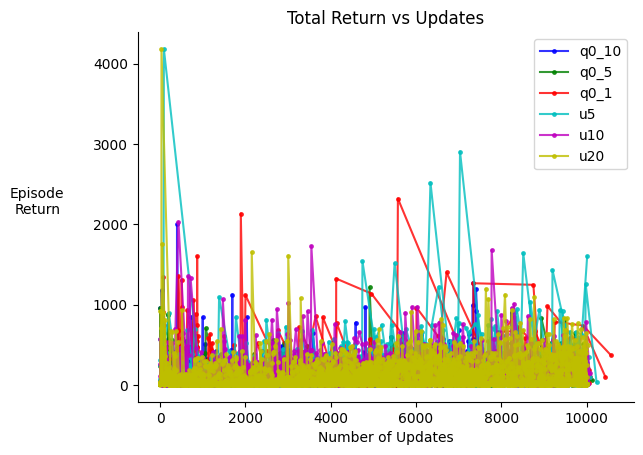

In [5]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

tuples_of_x_y_labels_kwargs = []
for i, (name, stats) in enumerate(results.items()):
    for r_idx, run in enumerate(stats):
        tuples_of_x_y_labels_kwargs.append((
            run["total_pivots"],
            run["total_return"],
            name if r_idx==0 else None,
            # {"color": colors[i], "marker": ".", "linestyle": "None", "markersize": 5, "alpha": 0.8}
            {"color": colors[i], "marker": ".", "linestyle": "-", "markersize": 5, "alpha": 0.8}
        ))

ax = plot_perf(tuples_of_x_y_labels_kwargs,
               "Total Return vs Updates", False)
# ax.set_yscale('log')
ax.set_xlabel('Number of Updates')
plt.show()


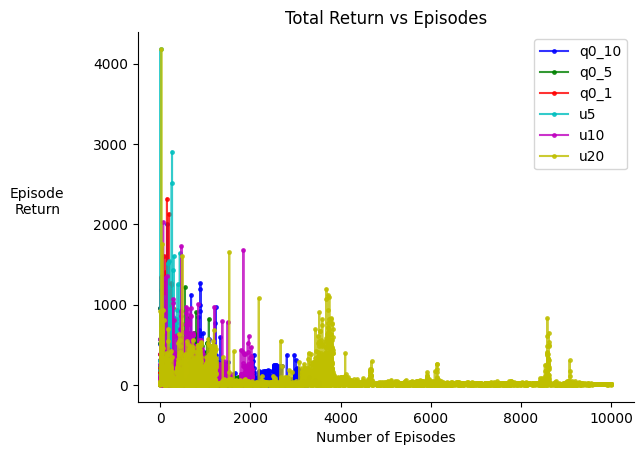

In [6]:


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

tuples_of_x_y_labels_kwargs = []
for i, (name, stats) in enumerate(results.items()):
    for r_idx, run in enumerate(stats):
        tuples_of_x_y_labels_kwargs.append((
            run["num_episode"],
            run["total_return"],
            name if r_idx==0 else None,
            # {"color": colors[i], "marker": ".", "linestyle": "None", "markersize": 5, "alpha": 0.8}
            {"color": colors[i], "marker": ".", "linestyle": "-", "markersize": 5, "alpha": 0.8}
        ))

ax = plot_perf(tuples_of_x_y_labels_kwargs,
               "Total Return vs Episodes", False)
# ax.set_yscale('log')
ax.set_xlabel('Number of Episodes')
plt.show()



## Plots of Average Performance

**USE `plot_utils.interpolate_and_stack()` instead of the implementation here!!!**

In [7]:
max_updates = max(
    max(run["total_pivots"][-1] for run in runs)
    for runs in results.values())
print(max_updates)

10576


In [8]:
all_updates = np.arange(0, max_updates+1)   # x-axis for the interpolated results

interpolated_results = {}  # Each element will be a numpy array
for name, stats_for_runs in results.items():
    interpolated_results[name] = np.zeros((len(stats_for_runs), len(all_updates)))
    for run_idx, run in enumerate(stats_for_runs):
        interpolated_results[name][run_idx] = np.interp(
            all_updates, run["total_pivots"], run["total_return"])

print(interpolated_results.keys())
print(interpolated_results['q0_10'].shape)

dict_keys(['q0_10', 'q0_5', 'q0_1', 'u5', 'u10', 'u20'])
(8, 10577)


In [9]:
mean_results = {}
for name, returns in interpolated_results.items():
    mean_results[name] = returns.mean(axis=0)


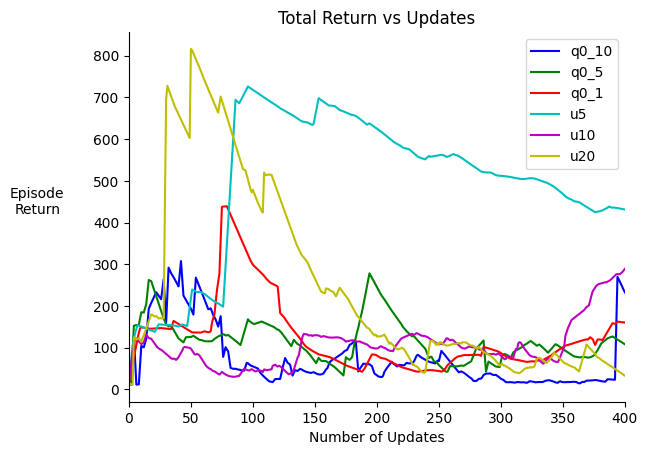

In [17]:

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

tuples_of_x_y_labels_kwargs = []
for i, (name, returns) in enumerate(mean_results.items()):
    tuples_of_x_y_labels_kwargs.append((
        all_updates, returns, name,
        # {"color": colors[i], "marker": ".", "linestyle": "None", "markersize": 5, "alpha": 0.8}
        {"color": colors[i], "marker": "", "linestyle": "-"}
    ))


ax = plot_perf(tuples_of_x_y_labels_kwargs,
               "Total Return vs Updates", False)
# ax.set_yscale('log')
ax.set_xlim(0, 400)
ax.set_xlabel('Number of Updates')
plt.show()
